<a href="https://colab.research.google.com/github/hannahcyrus/musicRecommedation_AI_ML/blob/main/music_recom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#songs=pd.read_csv("/content/drive/MyDrive/ai_ml/project/spotify dataset/SpotifyFeatures.csv")
songs1=pd.read_csv("/content/drive/MyDrive/ai_ml/project/SpotifySongs.csv")

In [3]:
#songs.info()
songs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3731 entries, 0 to 3730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SongName          3731 non-null   object 
 1   ArtistName        3731 non-null   object 
 2   Popularity        3731 non-null   int64  
 3   Danceability      3731 non-null   float64
 4   Energy            3731 non-null   float64
 5   Key               3731 non-null   int64  
 6   Loudness          3731 non-null   float64
 7   Mode              3731 non-null   int64  
 8   Speechiness       3731 non-null   float64
 9   Acousticness      3731 non-null   float64
 10  Instrumentalness  3731 non-null   float64
 11  Liveness          3731 non-null   float64
 12  Valence           3731 non-null   float64
 13  Tempo             3731 non-null   float64
 14  Duration_ms       3731 non-null   int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 437.4+ KB


In [4]:
songs1.isna().sum()

SongName            0
ArtistName          0
Popularity          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
dtype: int64

In [5]:
#songs1.sort_values("SongName",inplace=True)
songs1.drop_duplicates(subset ="SongName",
                     keep = False, inplace = True)
songs1

,SongName,ArtistName,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,Saiyaan Ji,Yo Yo Honey Singh,62,0.896,0.678,0,-2.546,0,0.0815,0.0137,0.000041,0.1100,0.604,130.024,205450
2,Shayad,Pritam,72,0.483,0.468,8,-7.642,1,0.0341,0.7850,0.000000,0.1520,0.319,135.864,247941
3,"Malang (Title Track) [From ""Malang - Unleash T...",Ved Sharma,68,0.384,0.728,7,-6.503,0,0.0623,0.3290,0.000018,0.3290,0.311,156.396,287374
4,Genda Phool (feat. Payal Dev),Badshah,67,0.955,0.538,1,-8.394,1,0.0734,0.1320,0.001460,0.0704,0.837,116.977,170769
7,You (with Marshmello & Vance Joy),benny blanco,73,0.668,0.563,11,-6.433,1,0.0522,0.0493,0.000000,0.1190,0.305,103.116,169632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,Electricity,Sam Pinkerton,53,0.883,0.728,0,-6.079,1,0.0506,0.2280,0.000000,0.1730,0.489,104.037,174027
3689,Illuminate,The Kite String Tangle,54,0.649,0.758,10,-5.647,0,0.0581,0.0364,0.000041,0.3600,0.737,120.001,167811
3690,BE OK,Samoht,79,0.766,0.706,7,-6.553,0,0.1600,0.2230,0.000280,0.0640,0.766,142.989,172598
3692,Dreams (feat. LUISAH),Blasterjaxx,50,0.550,0.234,0,-10.264,1,0.0358,0.9410,0.000003,0.0996,0.233,72.799,341918


In [6]:
acousticness= np.array(songs1['Acousticness'])
acousticness= acousticness.reshape(-1, 1)
Danceability=np.array(songs1['Danceability'])
Danceability=Danceability.reshape(-1,1)
Energy=np.array(songs1['Energy'])
Energy= Energy.reshape(-1, 1)
Instrumentalness=np.array(songs1["Instrumentalness"])
Instrumentalness=Instrumentalness.reshape(-1,1)
Liveness=np.array(songs1["Liveness"])
Liveness=Liveness.reshape(-1,1)
Valence=np.array(songs1["Valence"])
Valence=Valence.reshape(-1,1)
Tempo=np.array(songs1["Tempo"])
Tempo=Tempo.reshape(-1,1)
Speechiness=np.array(songs1["Speechiness"])
Speechiness=Speechiness.reshape(-1,1)
Loudness=np.array(songs1["Loudness"])
Loudness=Loudness.reshape(-1,1)
Popularity=np.array(songs1["Popularity"])
Popularity=Popularity.reshape(-1,1)

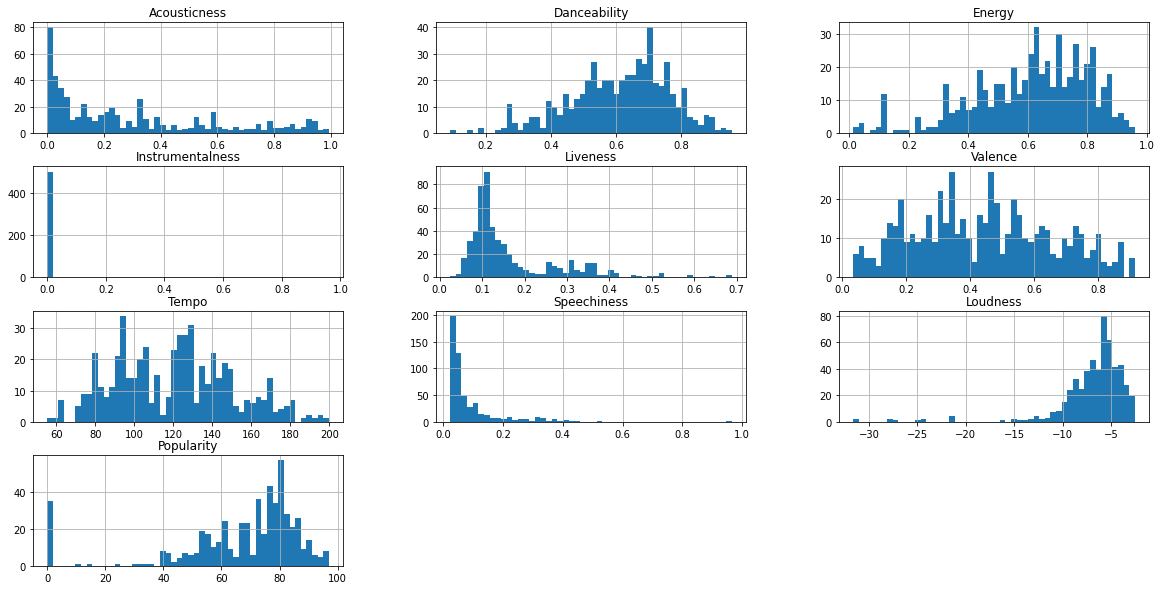

In [7]:


songs1[['Acousticness', 'Danceability', 'Energy','Instrumentalness', 'Liveness','Valence', 'Tempo','Speechiness', 'Loudness','Popularity']].hist(bins=50,figsize=(20,10))
plt.show()


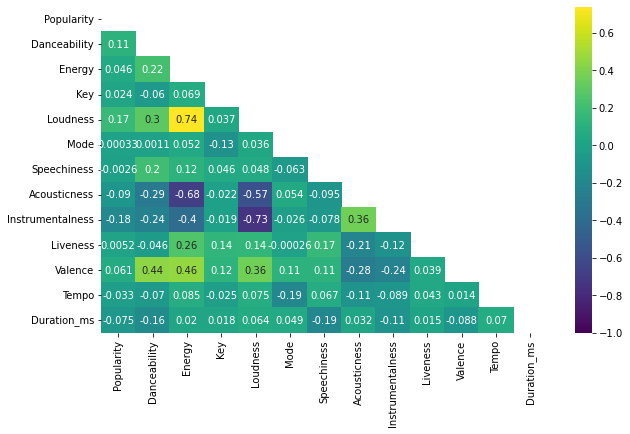

In [8]:
plt.figure(figsize=(10,6))

corr = songs1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,vmin=-1,cmap='viridis',annot=True
            )

In [9]:
corr[abs(corr['Popularity']) > 0.25]['Popularity']

Popularity    1.0
Name: Popularity, dtype: float64

In [10]:

from sklearn.preprocessing import MinMaxScaler

#from collections import defaultdict

In [11]:
columns_to_cluster = ['Acousticness', 'Danceability', 'Energy','Instrumentalness', 'Liveness','Valence', 'Tempo','Speechiness', 'Loudness','Popularity']
mms = MinMaxScaler()

songs_scaled = mms.fit_transform(songs1[columns_to_cluster])
print("song data: ", songs_scaled[0,:])


song data:  [1.36128080e-02 9.31665508e-01 7.02311834e-01 4.26638918e-05
 1.28537026e-01 6.46349784e-01 5.17081572e-01 6.15384615e-02
 1.00000000e+00 6.39175258e-01]


In [12]:
columns_to_cluster_scaled = ['acousticness_scaled', 'danceability_scaled', 
                             'energy_scaled', 'instrumentalness_scaled', 'liveness_scaled'
                             , 'valence_scaled', 'tempo_scaled','speechiness_scaled', 'loudness_scaled','popularity_scaled']

df_songs_scaled = pd.DataFrame(songs_scaled, columns=columns_to_cluster_scaled)


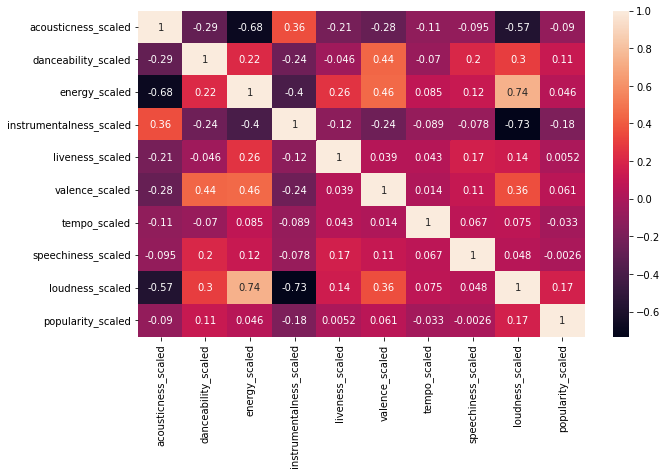

In [13]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(df_songs_scaled.corr(), annot=True)
plt.show()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
vector = cv.fit_transform(songs1["ArtistName"]).toarray()
#new_matrix = np.concatenate((vector, np.array(songs_scaled.reshape(-1, 1)))
ew_matrix = np.concatenate((vector, acousticness,Danceability,Energy,Instrumentalness, Liveness,Valence, Tempo,Speechiness, Loudness,Popularity), axis=1)


from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(ew_matrix)


                               

In [15]:
similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
similarity.shape

(536, 536)

In [17]:
songs1

,SongName,ArtistName,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms
0,Saiyaan Ji,Yo Yo Honey Singh,62,0.896,0.678,0,-2.546,0,0.0815,0.0137,0.000041,0.1100,0.604,130.024,205450
2,Shayad,Pritam,72,0.483,0.468,8,-7.642,1,0.0341,0.7850,0.000000,0.1520,0.319,135.864,247941
3,"Malang (Title Track) [From ""Malang - Unleash T...",Ved Sharma,68,0.384,0.728,7,-6.503,0,0.0623,0.3290,0.000018,0.3290,0.311,156.396,287374
4,Genda Phool (feat. Payal Dev),Badshah,67,0.955,0.538,1,-8.394,1,0.0734,0.1320,0.001460,0.0704,0.837,116.977,170769
7,You (with Marshmello & Vance Joy),benny blanco,73,0.668,0.563,11,-6.433,1,0.0522,0.0493,0.000000,0.1190,0.305,103.116,169632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,Electricity,Sam Pinkerton,53,0.883,0.728,0,-6.079,1,0.0506,0.2280,0.000000,0.1730,0.489,104.037,174027
3689,Illuminate,The Kite String Tangle,54,0.649,0.758,10,-5.647,0,0.0581,0.0364,0.000041,0.3600,0.737,120.001,167811
3690,BE OK,Samoht,79,0.766,0.706,7,-6.553,0,0.1600,0.2230,0.000280,0.0640,0.766,142.989,172598
3692,Dreams (feat. LUISAH),Blasterjaxx,50,0.550,0.234,0,-10.264,1,0.0358,0.9410,0.000003,0.0996,0.233,72.799,341918


In [27]:
def recommend(song):
    index = songs1[songs1['SongName'] == song].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(songs1.iloc[i[0]].SongName)
        

In [28]:
recommend("Saiyaan Ji")

A Sky Full of Stars
White Flag
Retour
Goodbye
Lie


In [20]:
import pickle


In [21]:
pickle.dump(songs1,open('song_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [29]:
%%writefile app.py

import pickle
import streamlit as st
import requests


def recommend(song):
    index = songss[songss['SongName'] == song].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommended_song_names = []
    for i in distances[1:6]:
        
        #track_id = songss.iloc[i[0]].track_id
        
        recommended_song_names.append(songss.iloc[i[0]].SongName)

    return recommended_song_names


st.header('Music Recommender System')
songss = pickle.load(open('song_list.pkl','rb'))
similarity = pickle.load(open('similarity.pkl','rb'))

song_list = songss['SongName'].values
selected_song= st.selectbox(
    "Type or select a movie from the dropdown",
    song_list
)

if st.button('Show Recommendation'):
    recommended_song_names = recommend(selected_song)
    col1, col2, col3, col4, col5 = st.columns(5)
    with col1:
        st.text(recommended_song_names[0])
        
    with col2:
        st.text(recommended_song_names[1])
        

    with col3:
        st.text(recommended_song_names[2])
       
    with col4:
        st.text(recommended_song_names[3])
        
    with col5:
        st.text(recommended_song_names[4])
       

Overwriting app.py


In [23]:
!pip install streamlit --quiet

     |████████████████████████████████| 10.1 MB 6.9 MB/s 
     |████████████████████████████████| 111 kB 43.2 MB/s 
     |████████████████████████████████| 4.3 MB 7.0 MB/s 
     |████████████████████████████████| 181 kB 43.5 MB/s 
     |████████████████████████████████| 164 kB 44.0 MB/s 
     |████████████████████████████████| 77 kB 1.7 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 131 kB 14.2 MB/s 
     |████████████████████████████████| 428 kB 57.5 MB/s 
     |████████████████████████████████| 793 kB 8.8 MB/s 
     |████████████████████████████████| 130 kB 50.3 MB/s 
     |████████████████████████████████| 381 kB 47.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-05-27 16:11:29.425 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.125.167.97:8501

npx: installed 22 in 2.888s
your url is: https://smooth-pears-play-34-125-167-97.loca.lt
